In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu
file_path = '/content/drive/MyDrive/IS353.P11_Nhóm_4/Đồ án môn học/Project/data_sampled.csv'
data = pd.read_csv(file_path)

In [ ]:
# Làm sạch tên cột
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(r'\s+', '_', regex=True)
print("\nTên cột sau khi làm sạch:")
print(data.columns.tolist())


Tên cột sau khi làm sạch:
['Unnamed:_0', 'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'diem_tt', 'dtbhk1', 'dtbhk2', 'dtbhk3', 'dtbhk4', 'dtbhk5', 'dtbhk6', 'dtbhk7', 'dtbhkh1', 'dtbhkh2', 'dtbhkh3', 'stchk1', 'stchk2', 'stchk3', 'stchk4', 'stchk5', 'stchk6', 'stchk7', 'stchkh1', 'stchkh2', 'stchkh3', 'sotc_tichluy', 'hoclaihk1', 'hoclaihk2', 'hoclaihk3', 'hoclaihk4', 'hoclaihk5', 'hoclaihk6', 'hoclaihk7', 'hoclaihkh1', 'hoclaihkh2', 'hoclaihkh3', 'AVHK1', 'AVHK2', 'AVHKH1', 'AVHK3', 'AVHK4', 'AVHKH2', 'AVHK5', 'AVHK6', 'AVHKH3', 'AVHK7', 'drlhk1', 'drlhk2', 'drlhk3', 'drlhk4', 'drlhk5', 'drlhk6', 'drlhk7', 'xeploai', 'cluster']


In [ ]:
# Bước 2: Chuẩn bị dữ liệu - lấy cột 'Unnamed: 0' làm ID sinh viên, 'lopsh' làm lớp học
df = data[['Unnamed:_0', 'lopsh', 'xeploai']]
df.columns = ['student_id', 'lopsh', 'xeploai']

In [ ]:
# Bước 3: Tạo mạng undirected graph
G = nx.Graph()

In [ ]:
# Bước 4: Thêm nodes và edges dựa trên lớp học
for lop, group in df.groupby('lopsh'):
    students = group['student_id'].tolist()
    # Fully connected subgraph for each class
    for i in range(len(students)):
        for j in range(i + 1, len(students)):
            G.add_edge(students[i], students[j])

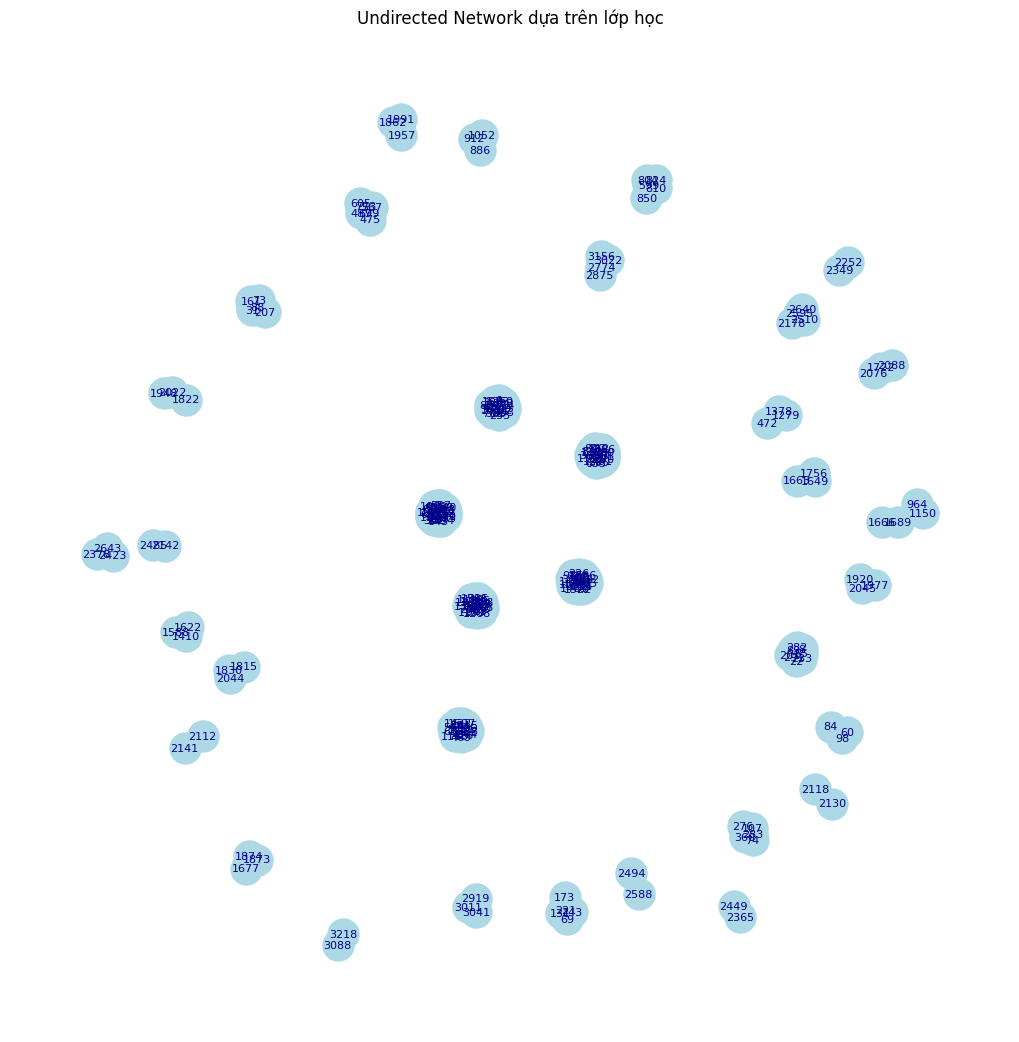

In [ ]:
# Bước 5: Vẽ mạng
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    font_size=8,
    font_color="darkblue",
    edge_color="gray"
)
plt.title("Undirected Network dựa trên lớp học")
plt.show()

In [ ]:
# Bước 6: Phân tích mạng (ví dụ)
print(f"Số đỉnh: {G.number_of_nodes()}")
print(f"Số cạnh: {G.number_of_edges()}")
print(f"Độ liên kết trung bình (Average Degree): {sum(dict(G.degree()).values()) / G.number_of_nodes()}")

Số đỉnh: 220
Số cạnh: 1350
Độ liên kết trung bình (Average Degree): 12.272727272727273


In [ ]:
# Tính các đặc trưng mạng
# 1. Degree (Độ liên kết)
degree_dict = dict(G.degree())

# 2. Clustering Coefficient (Hệ số cụm)
clustering_dict = nx.clustering(G)

# 3. Betweenness Centrality (Độ trung tâm trung gian)
betweenness_dict = nx.betweenness_centrality(G)

# 4. Closeness Centrality (Độ trung tâm gần gũi)
closeness_dict = nx.closeness_centrality(G)

# 5. Eigenvector Centrality (Độ trung tâm Eigenvector)
eigenvector_dict = nx.eigenvector_centrality(G)

In [ ]:
# Bước 2: Lưu các đặc trưng vào DataFrame cho dễ dàng sử dụng
features_df = pd.DataFrame({
    'student_id': list(degree_dict.keys()),
    'degree': list(degree_dict.values()),
    'clustering_coefficient': list(clustering_dict.values()),
    'betweenness_centrality': list(betweenness_dict.values()),
    'closeness_centrality': list(closeness_dict.values()),
    'eigenvector_centrality': list(eigenvector_dict.values())
})

In [ ]:
# Bước 3: Thêm các đặc trưng mạng vào dữ liệu gốc
df = pd.merge(df, features_df, left_index=True, right_index=True, how='left')

# Kiểm tra kết quả
print(df.head())

   student_id_x       lopsh  xeploai  student_id_y  degree  \
0          1279  KHMT2016.1        1        1957.0     2.0   
1           561    KTMT0001        0        1991.0     2.0   
2           173    MMTT2013        0        1862.0     2.0   
3           475    HTTT2014        0         543.0    15.0   
4          1529    KHMT0001        1         469.0    15.0   

   clustering_coefficient  betweenness_centrality  closeness_centrality  \
0                     1.0                     0.0              0.009132   
1                     1.0                     0.0              0.009132   
2                     1.0                     0.0              0.009132   
3                     1.0                     0.0              0.068493   
4                     1.0                     0.0              0.068493   

   eigenvector_centrality  
0            1.841651e-33  
1            1.841651e-33  
2            1.841651e-33  
3            1.803704e-09  
4            1.803704e-09  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
X = df[['degree', 'clustering_coefficient', 'betweenness_centrality',
        'closeness_centrality', 'eigenvector_centrality']]
y = df['xeploai']

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Chuẩn hóa dữ liệu (scaling) để cải thiện hiệu suất của các mô hình như SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.5
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.92      0.65        25
           1       0.50      0.10      0.16        21
           2       0.00      0.00      0.00         4

    accuracy                           0.50        50
   macro avg       0.33      0.34      0.27        50
weighted avg       0.46      0.50      0.39        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


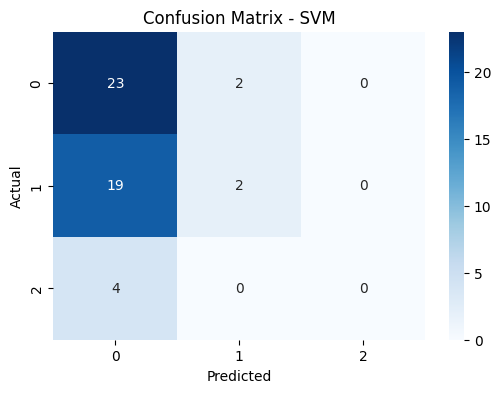

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Đánh giá mô hình Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.54
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.76      0.63        25
           1       0.53      0.38      0.44        21
           2       0.00      0.00      0.00         4

    accuracy                           0.54        50
   macro avg       0.36      0.38      0.36        50
weighted avg       0.50      0.54      0.50        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


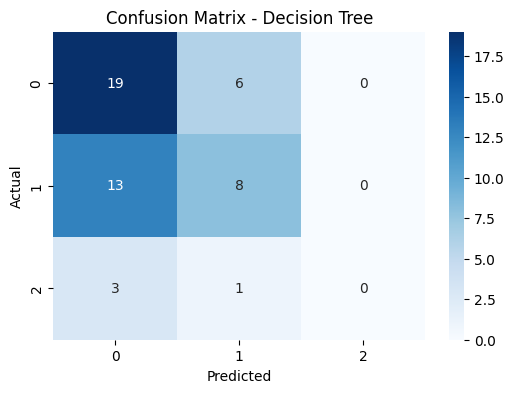

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# Đánh giá mô hình Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.92      0.65        25
           1       0.50      0.10      0.16        21
           2       0.00      0.00      0.00         4

    accuracy                           0.50        50
   macro avg       0.33      0.34      0.27        50
weighted avg       0.46      0.50      0.39        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


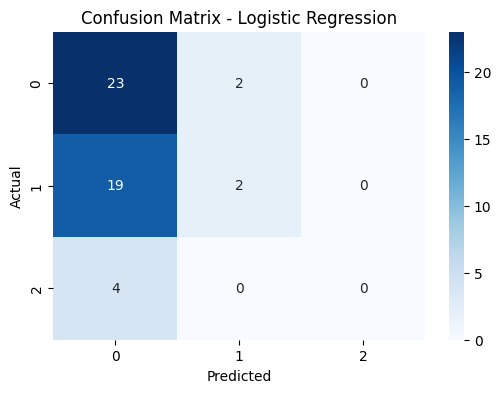

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Đọc dữ liệu của sinh viên chưa có xếp loại
file_path_new = '/content/drive/MyDrive/IS353.P11_Nhóm_4/Đồ án môn học/Project/data_after.csv'
data_new = pd.read_csv(file_path_new)

# Làm sạch tên cột
data_new.columns = data_new.columns.str.strip()
data_new.columns = data_new.columns.str.replace(r'\s+', '_', regex=True)
print("\nTên cột sau khi làm sạch:")
print(data_new.columns.tolist())


Tên cột sau khi làm sạch:
['Unnamed:_0', 'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'diem_tt', 'lop12_matinh', 'lop12_matruong', 'dtbhk1', 'dtbhk2', 'dtbhk3', 'dtbhk4', 'dtbhk5', 'dtbhk6', 'dtbhk7', 'dtbhkh1', 'dtbhkh2', 'dtbhkh3', 'stchk1', 'stchk2', 'stchk3', 'stchk4', 'stchk5', 'stchk6', 'stchk7', 'stchkh1', 'stchkh2', 'stchkh3', 'sotc_tichluy', 'hoclaihk1', 'hoclaihk2', 'hoclaihk3', 'hoclaihk4', 'hoclaihk5', 'hoclaihk6', 'hoclaihk7', 'hoclaihkh1', 'hoclaihkh2', 'hoclaihkh3', 'AVHK1', 'AVHK2', 'AVHKH1', 'AVHK3', 'AVHK4', 'AVHKH2', 'AVHK5', 'AVHK6', 'AVHKH3', 'AVHK7', 'drlhk1', 'drlhk2', 'drlhk3', 'drlhk4', 'drlhk5', 'drlhk6', 'drlhk7', 'xeploai']


In [ ]:
# Tạo mạng undirected graph cho dữ liệu mới (giả sử các lớp học đã được xác định)
df_new = data_new[['Unnamed:_0', 'lopsh']]  # Giả sử dữ liệu mới chỉ có 'student_id' và 'lopsh'

# Đổi tên cột cho đúng
df_new.columns = ['student_id', 'lopsh']

# Tạo mạng undirected graph
G_new = nx.Graph()

In [ ]:
# Thêm nodes và edges từ dữ liệu mới
for lop, group in df_new.groupby('lopsh'):
    students = group['student_id'].tolist()
    for i in range(len(students)):
        for j in range(i + 1, len(students)):
            G_new.add_edge(students[i], students[j])

In [ ]:
# Tính các đặc trưng mạng cho sinh viên mới
degree_dict_new = dict(G_new.degree())
clustering_dict_new = nx.clustering(G_new)
betweenness_dict_new = nx.betweenness_centrality(G_new)
closeness_dict_new = nx.closeness_centrality(G_new)
eigenvector_dict_new = nx.eigenvector_centrality(G_new)

In [ ]:
# Lưu các đặc trưng vào DataFrame
features_df_new = pd.DataFrame({
    'student_id': list(degree_dict_new.keys()),
    'degree': list(degree_dict_new.values()),
    'clustering_coefficient': list(clustering_dict_new.values()),
    'betweenness_centrality': list(betweenness_dict_new.values()),
    'closeness_centrality': list(closeness_dict_new.values()),
    'eigenvector_centrality': list(eigenvector_dict_new.values())
})

In [ ]:
# Thêm các đặc trưng mạng vào dữ liệu mới
df_new = pd.merge(df_new, features_df_new, left_index=True, right_index=True, how='left')

# Chuẩn hóa dữ liệu (scaling)
X_new = df_new[['degree', 'clustering_coefficient', 'betweenness_centrality',
                'closeness_centrality', 'eigenvector_centrality']]

In [ ]:

# Chuẩn bị dữ liệu đầu vào cho mô hình (scaling và imputation)
X_new_imputed = imputer.transform(X_new)
X_new_scaled = scaler.transform(X_new_imputed)

In [ ]:
# Dự đoán xếp loại với mô hình SVM, Decision Tree và Logistic Regression
y_pred_svm_new = svm_model.predict(X_new_scaled)
y_pred_dt_new = dt_model.predict(X_new)
y_pred_lr_new = lr_model.predict(X_new_scaled)

In [ ]:
# Thêm xếp loại dự đoán vào dữ liệu
df_new['xeploai_svm'] = y_pred_svm_new
df_new['xeploai_dt'] = y_pred_dt_new
df_new['xeploai_lr'] = y_pred_lr_new

In [ ]:
print(df_new.head())

   student_id_x     lopsh  student_id_y  degree  clustering_coefficient  \
0             0  KTPM0001          26.0    18.0                     1.0   
1             1  KTPM0001          30.0    18.0                     1.0   
2             2  HTTT0001          87.0    18.0                     1.0   
3             3  KHMT0001         112.0    18.0                     1.0   
4             4  MMTT0001         144.0    18.0                     1.0   

   betweenness_centrality  closeness_centrality  eigenvector_centrality  \
0                     0.0              0.005549            1.378212e-81   
1                     0.0              0.005549            1.378212e-81   
2                     0.0              0.005549            1.378212e-81   
3                     0.0              0.005549            1.378212e-81   
4                     0.0              0.005549            1.378212e-81   

   xeploai_svm  xeploai_dt  xeploai_lr  
0            0           1           0  
1            0  